In [1]:
import codecs, json
import pandas as pd
from textblob import TextBlob
import re
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
def clean_tweet(tweet):
    return ' '.join(re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\S+)", " ", tweet).split())

def textbl(tweet):
    text = clean_tweet(tweet)
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

def sent(tweet):
    text = clean_tweet(tweet)
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.5:
        return 0
    else:
        return 1

with open('depressionc.json', 'r', encoding='utf-8') as f:
    tweets = json.load(f)


list_tweets = [list(elem.values()) for elem in tweets]
list_columns = list(tweets[0].keys())
df = pd.DataFrame(list_tweets, columns=list_columns)

df['Depressed'] = np.array([str(sent(tweet)) for tweet in df['text']])

In [3]:
d = df.drop(['user','text','url','fullname','timestamp','id'], axis=1)

y = d.Depressed
X = d.drop('Depressed', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

Training Accuracy: 87.94
Testing Accuracy: 83.52
Confusion Matrix:
 [[ 399  137]
 [ 198 1299]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.74      0.70       536
           1       0.90      0.87      0.89      1497

    accuracy                           0.84      2033
   macro avg       0.79      0.81      0.80      2033
weighted avg       0.84      0.84      0.84      2033

Cross Validation Accuracy: 80.43
AUC Score: 0.874


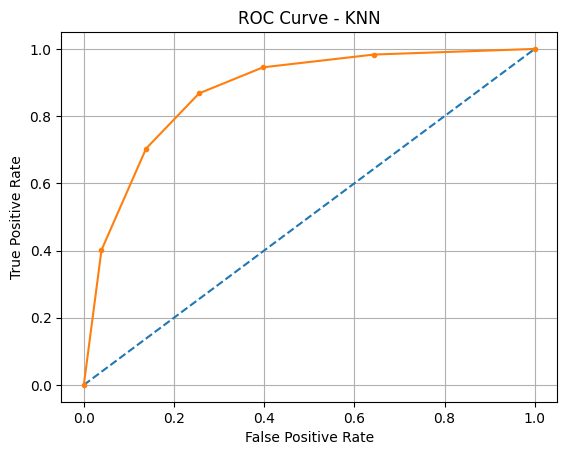

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# ✅ Step 1: Clean HTML from tweets
def clean_html(text):
    return BeautifulSoup(text, 'html.parser').get_text()

df['clean_html'] = df['html'].apply(clean_html)

# ✅ Step 2: Vectorize the cleaned tweets
vectorizer = TfidfVectorizer(max_df=0.9, stop_words='english')
X = vectorizer.fit_transform(df['clean_html'])
y = df['Depressed'].astype(int)

# ✅ Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ Step 4: Train and evaluate KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("Training Accuracy:", round(knn.score(X_train, y_train) * 100, 2))
print("Testing Accuracy:", round(knn.score(X_test, y_test) * 100, 2))

# Predictions
y_pred = knn.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Cross-validation
cv_score = cross_val_score(knn, X, y, scoring='accuracy', cv=10).mean()
print("Cross Validation Accuracy:", round(cv_score * 100, 2))

# ✅ Step 5: ROC AUC
probs = knn.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, probs)
print('AUC Score: %.3f' % roc_score)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve - KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.show()


Training Accuracy:
92.43
Testing Accuracy:
88.64
Confusion Matrix:
[[ 361  175]
 [  56 1441]]
Classification Matrix:
              precision    recall  f1-score   support

           0       0.87      0.67      0.76       536
           1       0.89      0.96      0.93      1497

    accuracy                           0.89      2033
   macro avg       0.88      0.82      0.84      2033
weighted avg       0.88      0.89      0.88      2033

Cross Validation value:
0.8667148141854355
AUC: 0.950


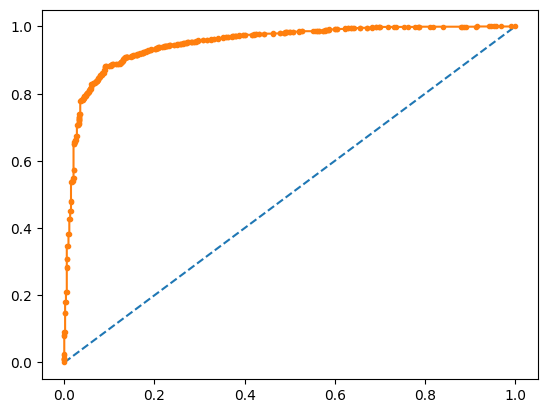

In [5]:
logistic_regression_model = LogisticRegression()
trained_logistic_regression_model = logistic_regression_model.fit(X_train, y_train)
train_accuracy = round (trained_logistic_regression_model.score(X_train, y_train)*100, 2)
print ("Training Accuracy:")
print(train_accuracy)
test_accuracy = round (trained_logistic_regression_model.score(X_test, y_test)*100, 2)
print ("Testing Accuracy:")
print(test_accuracy)
probability = logistic_regression_model.predict_proba(X_test)
predicted = logistic_regression_model.predict(X_test)
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, predicted))
print("Classification Matrix:")
print(metrics.classification_report(y_test, predicted))
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print("Cross Validation value:")
print(cross_val.mean())
probs = probability[:, 1]
roc = roc_auc_score(y_test.astype(float), probs)
print('AUC: %.3f' % roc)
fpr, tpr, thresholds = roc_curve(y_test.astype(float), probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report

# Train
random_forest_model = RandomForestClassifier(n_estimators=300)
random_forest_model.fit(X_train, y_train)

# Accuracy
train_accuracy = round(random_forest_model.score(X_train, y_train)*100, 2)
print("Training Accuracy:", train_accuracy)

test_accuracy = round(random_forest_model.score(X_test, y_test)*100, 2)
print("Testing Accuracy:", test_accuracy)

# Predict
y_pred = random_forest_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Cross Validation
cross_val = cross_val_score(RandomForestClassifier(), X, y, scoring='accuracy', cv=10)
print("Cross Validation Accuracy:", round(cross_val.mean()*100, 2))

# AUC / ROC
probs = random_forest_model.predict_proba(X_test)[:, 1]
roc = roc_auc_score(y_test.astype(float), probs)
print('AUC Score: %.3f' % roc)

fpr, tpr, thresholds = roc_curve(y_test.astype(float), probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.show()


Training Accuracy: 99.98
Testing Accuracy: 90.36
Confusion Matrix:
 [[ 437   99]
 [  97 1400]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       536
           1       0.93      0.94      0.93      1497

    accuracy                           0.90      2033
   macro avg       0.88      0.88      0.88      2033
weighted avg       0.90      0.90      0.90      2033

